1. **importing dependencies and review dataset**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import pandas as pd

# Load the dataset
sentiment_data = pd.read_csv('/content/sentiment_analysis.csv', encoding='latin-1')

# Display the first 1963 rows as a table
from google.colab.data_table import DataTable

DataTable(sentiment_data.head(1963))  # This will display an interactive table


,Unnamed: 0,productTitle,productURL,Customer Name,Date,Review Title,Rating,Review Body
0,1,Amazon.in:Customer reviews: Puma mens Dazzler ...,https://www.amazon.in/Puma-Dazzler-Black-Puma-...,Ashiq mohanan,08-Jan-24,5.0 out of 5 stars\nQuality shoes on affordabl...,5,"Value of money, good build quality, comfortabl..."
1,2,Amazon.in:Customer reviews: Puma Unisex-Adult ...,https://www.amazon.in/Puma-Unisex-Adult-Smashi...,Gurpreet kaur,03-Feb-24,5.0 out of 5 stars\nGood product,5,Same as picture
2,3,Amazon.in:Customer reviews: Puma Unisex-Adult ...,https://www.amazon.in/Puma-Unisex-Adult-Badmin...,Kf,17-Jan-24,5.0 out of 5 stars\nWorth every Penny,5,"Excellent and very comfortable, superb grip go..."
3,4,Amazon.in:Customer reviews: Puma Mens Ultimate...,https://www.amazon.in/Puma-Mens-Ultimate-Ease-...,Sharmila Das,24-Feb-24,5.0 out of 5 stars\nAwesome quality i loved,5,I loved because shoes lightweight soft ..Comfo...
4,5,Amazon.in:Customer reviews: Puma Mens Melanite...,https://www.amazon.in/Puma-Mens-Melanite-Gray-...,Dinesh Kumar Masta,29-Oct-23,5.0 out of 5 stars\nGood fit and comfortable,5,"Good quality, lightweight and fit well to my f..."
...,...,...,...,...,...,...,...,...
124,125,Nike mens Metcon 8 Workout,https://www.amazon.com/Nike-mens-Metcon-8-Work...,Ryan Nash,"February 22, 2024",5.0 out of 5 stars\nWorking great as lifting s...,5,Fit is comfortable and sizing is as expected. ...
125,126,Nike Women's Air Max Excee Shoes,https://www.amazon.com/Nike-Womens-Air-Excee-S...,Nicole Monahan,"February 20, 2024",5.0 out of 5 stars\nGreat look,5,Took a little longer than expected to get them...
126,127,Nike mens React Infinity 3,https://www.amazon.com/Nike-mens-React-Infinit...,Triccia Go,"January 12, 2024","5.0 out of 5 stars\nDurable, comfortable every...",5,"As title says, these are super durable and com..."
127,128,Nike mens Running,https://www.amazon.com/Nike-mens-Running/produ...,Mike Kramer,"January 22, 2024",5.0 out of 5 stars\nGood shoe,5,"Good fit, decent style for 14 year old, and re..."


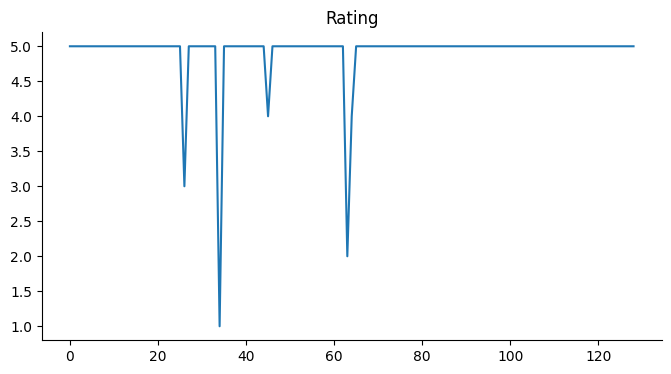

In [4]:
# @title Rating

from matplotlib import pyplot as plt
sentiment_data['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

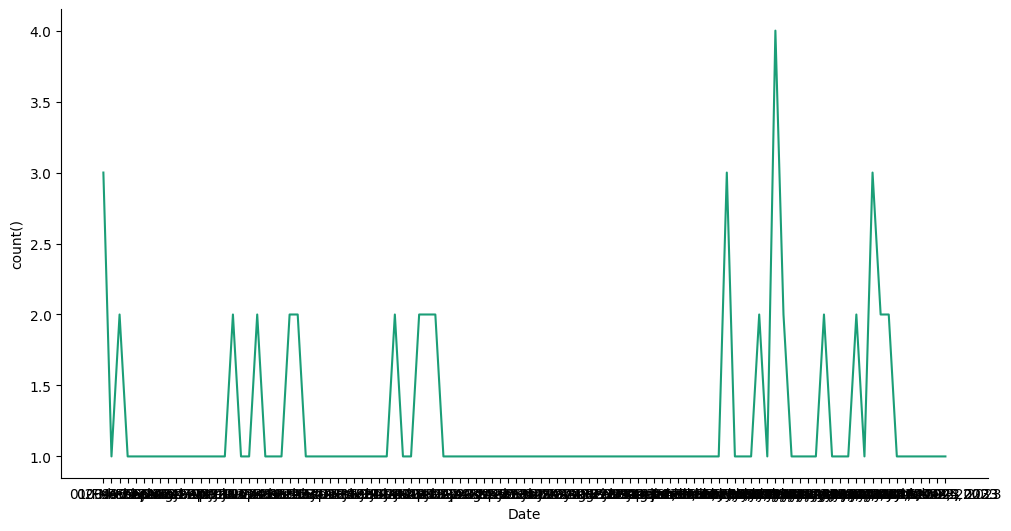

In [5]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sentiment_data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

In [6]:
sentiment_data.shape

(129, 8)

In [7]:
sentiment_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     129 non-null    int64 
 1   productTitle   129 non-null    object
 2   productURL     129 non-null    object
 3   Customer Name  129 non-null    object
 4   Date           129 non-null    object
 5   Review Title   129 non-null    object
 6   Rating         129 non-null    int64 
 7   Review Body    129 non-null    object
dtypes: int64(2), object(6)
memory usage: 8.2+ KB


In [8]:
sentiment_data.shape

(129, 8)

In [9]:
sentiment_data.isnull().sum()


,0
Unnamed: 0,0
productTitle,0
productURL,0
Customer Name,0
Date,0
Review Title,0
Rating,0
Review Body,0


In [10]:
pd.unique(sentiment_data['Rating'])


array([5, 3, 1, 4, 2])

**Rating graph**

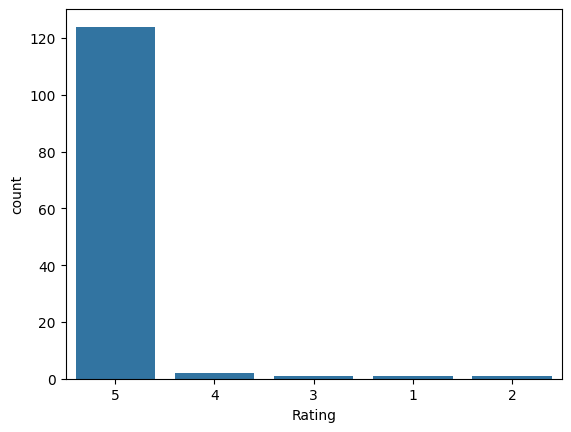

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=sentiment_data, x='Rating', order=sentiment_data['Rating'].value_counts().index)
plt.show()


**Creating " sentiment " Column**

In [12]:
import pandas as pd

# Assuming sentiment_data is your DataFrame
# Create an empty list to store positive (1), negative (0), or neutral (2) labels
pos_neg_neutral = []

# Iterate through the 'Rating' column
for rating in sentiment_data['Rating']:
    if rating >= 5:
        pos_neg_neutral.append(1)  # Positive
    elif rating <= 2:
        pos_neg_neutral.append(0)  # Negative
    else:
        pos_neg_neutral.append(2)  # Neutral

# Add the 'sentiments' column to the DataFrame
sentiment_data['sentiments'] = pos_neg_neutral


**Review-Text-Punctuation cleaning**

In [13]:
from tqdm import tqdm


def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		# Removing punctuations
		sentence = re.sub(r'[^\w\s]', '', sentence)

		# Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower()
										for token in nltk.word_tokenize(sentence)
										if token.lower() not in stopwords.words('english')))

	return preprocessed_text


In [14]:
# Assuming you have a function named preprocessed_text
def preprocessed_text(text):
  sentiment_data['Review Body'] = sentiment_data['Review Body'].apply(preprocessed_text)



In [15]:
from google.colab import files
import pandas as pd

# Assuming sentiment_data is your DataFrame
sentiment_data.head(50)

# Save the DataFrame to a CSV file
sentiment_data.to_csv('sentiment.csv', index=False)

# Download the CSV file
files.download('sentiment.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentiment_data["sentiments"].value_counts()

1    124
2      3
0      3
Name: sentiments, dtype: int64

**Date vs Sentiment count**

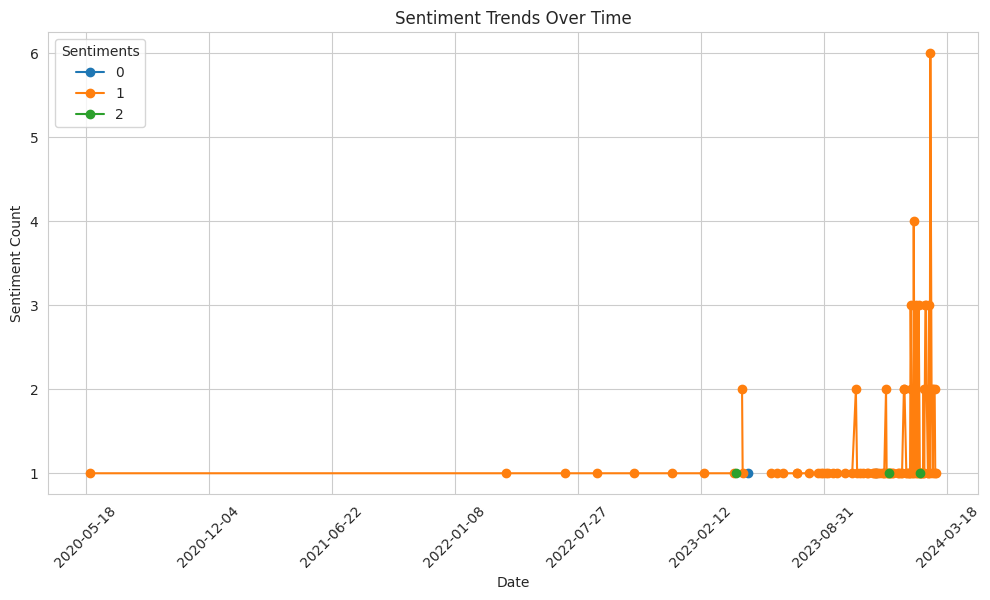

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format and sort
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])
sentiment_counts = sentiment_data.groupby(['Date', 'sentiments'])['sentiments'].count().unstack().reset_index()
sentiment_counts = sentiment_counts.sort_values(by='Date')  # Sort by date

# Plot using a line chart
plt.figure(figsize=(12, 6))
for sentiment in sentiment_counts.columns[1:]:  # Skip 'Date' column
    plt.plot(sentiment_counts['Date'], sentiment_counts[sentiment], marker='o', label=sentiment)

plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')

# Format x-axis for better readability
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Show limited ticks for clarity

plt.legend(title="Sentiments")
plt.grid(True)
plt.show()



**Calculate sentiment polarity, review length, and word count**

In [20]:
!pip install textblob

In [21]:
import pandas as pd
from textblob import TextBlob

# Load your dataset
df = pd.read_csv('sentiment.csv', encoding='latin-1')

# Calculate sentiment polarity, review length, and word count
df['polarity'] = df['Review Body'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
df['word_count'] = df['Review Body'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['Review Body'].astype(str).apply(len)



In [22]:
df.head(36)

,Unnamed: 0,productTitle,productURL,Customer Name,Date,Review Title,Rating,Review Body,sentiments,polarity,word_count,review_len
0,1,Amazon.in:Customer reviews: Puma mens Dazzler ...,https://www.amazon.in/Puma-Dazzler-Black-Puma-...,Ashiq mohanan,08-Jan-24,5.0 out of 5 stars\nQuality shoes on affordabl...,5,"Value of money, good build quality, comfortabl...",1,0.194000,29,160
1,2,Amazon.in:Customer reviews: Puma Unisex-Adult ...,https://www.amazon.in/Puma-Unisex-Adult-Smashi...,Gurpreet kaur,03-Feb-24,5.0 out of 5 stars\nGood product,5,Same as picture,1,0.000000,3,15
2,3,Amazon.in:Customer reviews: Puma Unisex-Adult ...,https://www.amazon.in/Puma-Unisex-Adult-Badmin...,Kf,17-Jan-24,5.0 out of 5 stars\nWorth every Penny,5,"Excellent and very comfortable, superb grip go...",1,0.553333,15,103
3,4,Amazon.in:Customer reviews: Puma Mens Ultimate...,https://www.amazon.in/Puma-Mens-Ultimate-Ease-...,Sharmila Das,24-Feb-24,5.0 out of 5 stars\nAwesome quality i loved,5,I loved because shoes lightweight soft ..Comfo...,1,0.400000,7,52
4,5,Amazon.in:Customer reviews: Puma Mens Melanite...,https://www.amazon.in/Puma-Mens-Melanite-Gray-...,Dinesh Kumar Masta,29-Oct-23,5.0 out of 5 stars\nGood fit and comfortable,5,"Good quality, lightweight and fit well to my f...",1,0.550000,9,50
5,6,Amazon.in:Customer reviews: Puma Unisex Duke I...,https://www.amazon.in/Puma-White-Quarry-Runnin...,Pradeep,21-Jan-24,5.0 out of 5 stars\nAwesome,5,"It is a very good shoe, it is not heavy at all...",1,0.452500,27,121
6,7,Amazon.in:Customer reviews: Puma Mens Coarse B...,https://www.amazon.in/Puma-Mens-Coarse-Black-W...,Abhinav Bhutra,13-Feb-24,5.0 out of 5 stars\n**Product Review: Average ...,5,I recently purchased a pair of shoes that were...,1,0.114897,310,1925
7,8,Amazon.in:Customer reviews: Puma Mens Alfarun ...,https://www.amazon.in/Puma-Alfarun-White-Team-...,Ritik roy,01-Feb-24,5.0 out of 5 stars\nAt first fit it may would ...,5,"Very happy and satisfied,value of money clearl...",1,0.366667,27,157
8,9,Amazon.in:Customer reviews: Puma Mens Radcliff...,https://www.amazon.in/Puma-Radcliff-Puma-Black...,amit,19-Jan-24,5.0 out of 5 stars\nExpensive but worth the money,5,This is the most comfortable sports shoes i ha...,1,0.379259,48,237
9,10,Amazon.in:Customer reviews: Puma Mens Voltige ...,https://www.amazon.in/Puma-Mens-Voltige-Gray-B...,Naveen k.,19-Jan-24,5.0 out of 5 stars\nBest purchase,5,One of the best sneaker in Puma store very lig...,1,0.497500,18,94


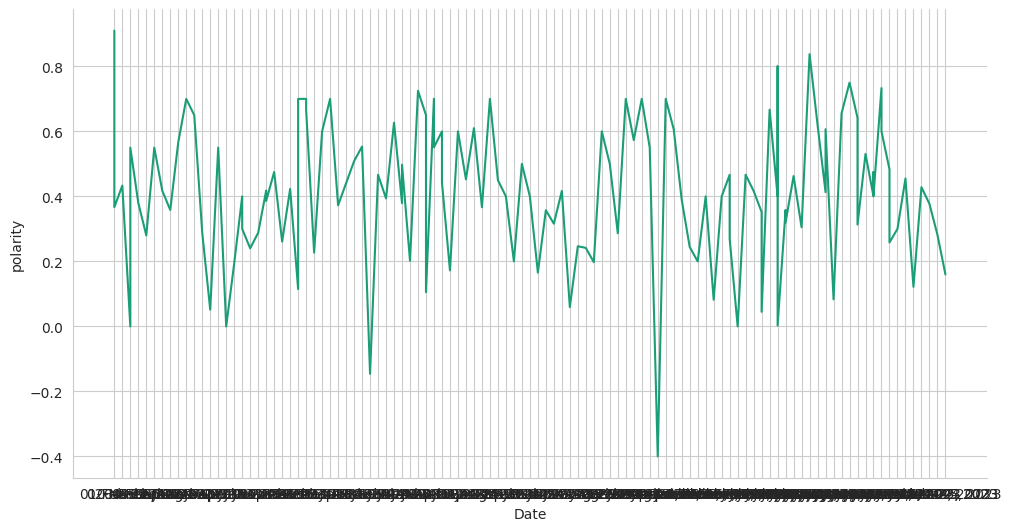

In [23]:
# @title Date vs polarity

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['polarity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('polarity')

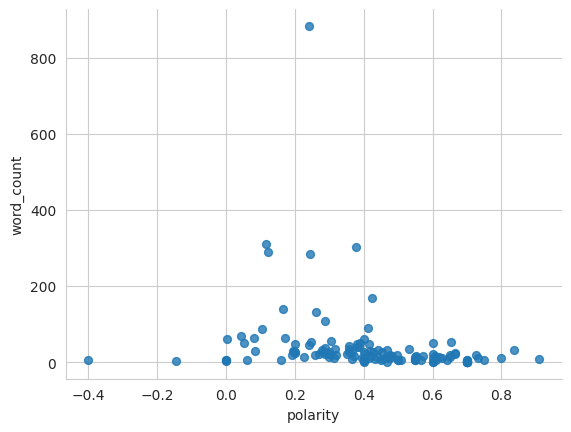

In [24]:
# @title polarity vs word_count

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='polarity', y='word_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**sentiment** **polarity** **distribution**

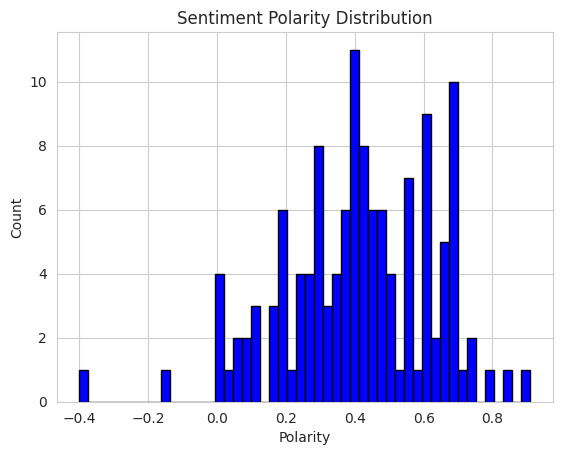

In [25]:
import matplotlib.pyplot as plt

# Assuming sentiment_data is your DataFrame
# Replace 'polarity' with your actual column name containing sentiment polarity

# Calculate sentiment polarity if not already done
# sentiment_data['polarity'] = ...

# Plot the sentiment polarity distribution using a histogram
plt.hist(df['polarity'], bins=50, color='blue', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()



**Review Rating** **Distribution**

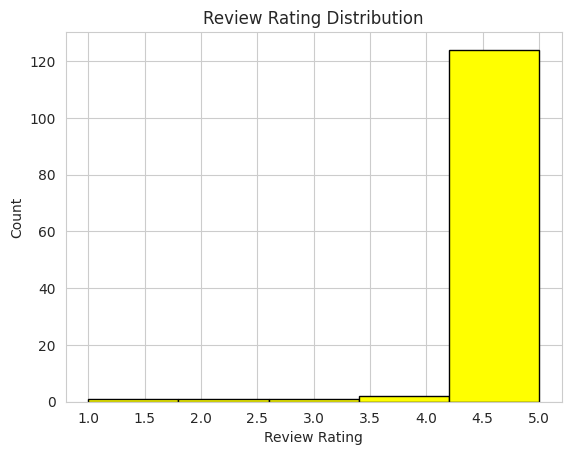

In [26]:
import matplotlib.pyplot as plt

# Assuming sentiment_data is your DataFrame
# Replace 'Review Rating' with your actual column name containing review ratings

# Plot the review rating distribution using a histogram
plt.hist(sentiment_data['Rating'], bins=5, color='yellow', edgecolor='black', range=(1, 5))
plt.title('Review Rating Distribution')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()


**'Review Text Length Distribution**

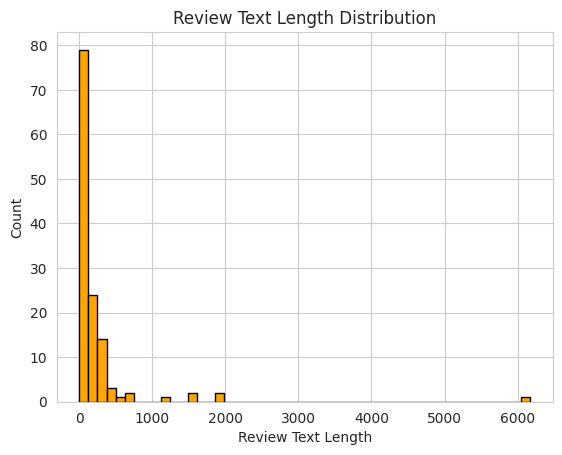

In [27]:
import matplotlib.pyplot as plt

# Assuming sentiment_data is your DataFrame
# Replace 'Review Text' with your actual column name containing review text

# Calculate review text lengths
sentiment_data['review_len'] = sentiment_data['Review Body'].apply(len)

# Plot the review text length distribution using a histogram
plt.hist(sentiment_data['review_len'], bins=50, color='orange', edgecolor='black')
plt.title('Review Text Length Distribution')
plt.xlabel('Review Text Length')
plt.ylabel('Count')
plt.show()


**Review Text Word Count Distribution**

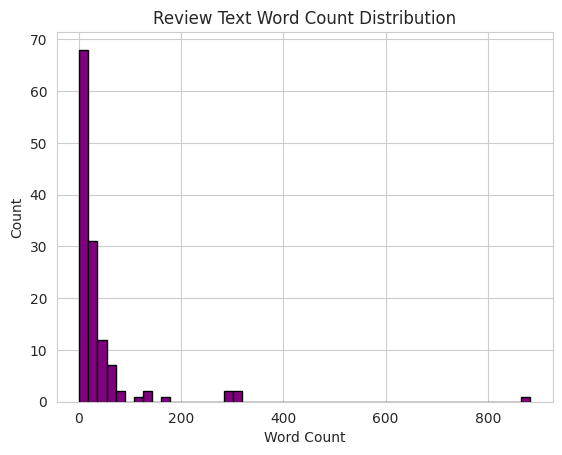

In [28]:
import matplotlib.pyplot as plt

# Assuming sentiment_data is your DataFrame
# Replace 'Review Text' with your actual column name containing review text

# Calculate review text word counts
sentiment_data['word_count'] = sentiment_data['Review Body'].apply(lambda x: len(str(x).split()))

# Plot the review text word count distribution using a histogram
plt.hist(sentiment_data['word_count'], bins=50, color='purple', edgecolor='black')
plt.title('Review Text Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()


**STOPWORDS**

In [29]:
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Get all English stopwords
all_stopwords = set(stopwords.words('english'))

# Display all stopwords
print(all_stopwords)



{'who', 'weren', "haven't", 'theirs', 'under', 'shan', 'do', 'does', 'she', 'then', 'himself', 'too', 'and', 'now', 'wasn', 'ma', 'hadn', 'wouldn', 'between', 'are', 'nor', 'because', 'up', "hadn't", 'we', 'you', 'i', "mightn't", 'only', "we've", 'y', 'any', 'ourselves', "should've", 'both', 'an', 'at', 'he', "i've", 'for', 'very', 'were', 'again', "you've", 'haven', 'if', 'than', "it'd", 'against', 'over', "they've", 'about', 'above', "she's", 'my', 'will', 'them', 'whom', 'below', 'few', 'until', 'ours', "you're", 'doing', 'so', 'those', 'during', 'doesn', "she'd", 'o', 'there', 'own', "needn't", 'into', 'needn', "he'd", "it'll", 'ain', 'same', 'while', 'further', 'yours', 'some', 'd', "we'll", 'being', 've', 'am', 'was', 'have', 'just', 'these', "i'll", 'it', 'its', 'after', 'been', "i'd", 'such', 'off', 'what', 'other', 'but', 'his', "i'm", "we're", "aren't", 'has', 'this', 'in', "you'll", 'her', 'how', 'their', 'aren', "doesn't", "weren't", 'shouldn', 'myself', 'when', 'him', 'won

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Assuming sentiment_data is your DataFrame and 'Review Body' is the column you want to process
stopwords=set(stopwords.words('english'))

sentiment_data['Review Body'] = sentiment_data['Review Body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))

sentiment_data.head(130)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,productTitle,productURL,Customer Name,Date,Review Title,Rating,Review Body,sentiments,review_len,word_count
0,1,Amazon.in:Customer reviews: Puma mens Dazzler ...,https://www.amazon.in/Puma-Dazzler-Black-Puma-...,Ashiq mohanan,2024-01-08,5.0 out of 5 stars\nQuality shoes on affordabl...,5,"Value money, good build quality, comfortable r...",1,160,29
1,2,Amazon.in:Customer reviews: Puma Unisex-Adult ...,https://www.amazon.in/Puma-Unisex-Adult-Smashi...,Gurpreet kaur,2024-02-03,5.0 out of 5 stars\nGood product,5,picture,1,15,3
2,3,Amazon.in:Customer reviews: Puma Unisex-Adult ...,https://www.amazon.in/Puma-Unisex-Adult-Badmin...,Kf,2024-01-17,5.0 out of 5 stars\nWorth every Penny,5,"Excellent comfortable, superb grip go ahead wi...",1,99,15
3,4,Amazon.in:Customer reviews: Puma Mens Ultimate...,https://www.amazon.in/Puma-Mens-Ultimate-Ease-...,Sharmila Das,2024-02-24,5.0 out of 5 stars\nAwesome quality i loved,5,loved shoes lightweight soft ..Comfortable,1,52,7
4,5,Amazon.in:Customer reviews: Puma Mens Melanite...,https://www.amazon.in/Puma-Mens-Melanite-Gray-...,Dinesh Kumar Masta,2023-10-29,5.0 out of 5 stars\nGood fit and comfortable,5,"Good quality, lightweight fit well feet.",1,50,9
...,...,...,...,...,...,...,...,...,...,...,...
124,125,Nike mens Metcon 8 Workout,https://www.amazon.com/Nike-mens-Metcon-8-Work...,Ryan Nash,2024-02-22,5.0 out of 5 stars\nWorking great as lifting s...,5,Fit comfortable sizing expected. working great...,1,102,18
125,126,Nike Women's Air Max Excee Shoes,https://www.amazon.com/Nike-Womens-Air-Excee-S...,Nicole Monahan,2024-02-20,5.0 out of 5 stars\nGreat look,5,Took little longer expected get them. shoes gr...,1,94,18
126,127,Nike mens React Infinity 3,https://www.amazon.com/Nike-mens-React-Infinit...,Triccia Go,2024-01-12,"5.0 out of 5 stars\nDurable, comfortable every...",5,"title says, super durable comfortable everyday...",1,174,30
127,128,Nike mens Running,https://www.amazon.com/Nike-mens-Running/produ...,Mike Kramer,2024-01-22,5.0 out of 5 stars\nGood shoe,5,"Good fit, decent style 14 year old, reasonably...",1,61,11


In [31]:
review_pos = sentiment_data[sentiment_data["sentiments"]== 'Positive'].dropna()
review_pos = sentiment_data[sentiment_data["sentiments"]== 'Neutral'].dropna()
review_pos = sentiment_data[sentiment_data["sentiments"]== 'Negative'].dropna()

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ")
    if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
             color=color,
             ),
         )
    return trace

**TOKENIZATION**

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming 'sentiment_data' is your DataFrame with 'Review Body' column
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentiment_data['Review Body'])

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)


1204
{'<OOV>': 1, 'shoes': 2, 'comfortable': 3, 'good': 4, 'shoe': 5, 'fit': 6, 'great': 7, 'running': 8, 'wear': 9, 'quality': 10, 'product': 11, 'design': 12, 'comfort': 13, 'price': 14, 'light': 15, 'nice': 16, 'look': 17, 'feel': 18, 'one': 19, 'size': 20, 'weight': 21, 'also': 22, 'on': 23, 'puma': 24, 'looks': 25, 'slip': 26, 'well': 27, 'pair': 28, 'support': 29, 'style': 30, 'sneakers': 31, 'foot': 32, 'even': 33, 'like': 34, 'softride': 35, 'feet': 36, 'cushioning': 37, 'buy': 38, 'adidas': 39, 'bold': 40, 'perfect': 41, 'use': 42, 'sole': 43, 'nike': 44, 'rift': 45, 'them': 46, 'time': 47, 'still': 48, "men's": 49, 'performance': 50, 'son': 51, 'fits': 52, 'technology': 53, 'the': 54, 'get': 55, 'bought': 56, 'money': 57, 'grip': 58, 'overall': 59, 'lightweight': 60, 'making': 61, 'recommend': 62, 'really': 63, 'long': 64, 'perfectly': 65, 'i': 66, 'it': 67, 'runners': 68, 'stability': 69, 'year': 70, 'amazon': 71, 'value': 72, 'without': 73, 'high': 74, 'construction': 75, '

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Replace 'sentences' with your actual variable containing the text data
sequences = tokenizer.texts_to_sequences(sentiment_data)
padded = pad_sequences(sequences, padding="post")

# Printing the first padded sequence and its shape
print(padded[0])
print(padded.shape)


[1 1]
(11, 2)


In [35]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = "post"
padding_type  = "post"
oov_tok = "<OOV>"
training_size = 8000

In [36]:
# Assuming 'sentiment_data' is your DataFrame with 'Review Body' and 'Sentiment' columns
training_size = int(len(sentiment_data) * 0.8)

# Replace 'Review Body' and 'Sentiment' with your actual column names
training_sentences = sentiment_data['Review Body'][:training_size]
testing_sentences = sentiment_data['Review Body'][training_size:]
training_labels = sentiment_data['sentiments'][:training_size]
testing_labels = sentiment_data['sentiments'][training_size:]


In [37]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

**Plot confusion matrix**

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalise=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalise:
    cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
     print("Confusion matrix, without normalisation")

**MODEL SELECTION**

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Assuming 'sentiment.csv' contains 'Review Body' and 'sentiment' columns
reviews_df = pd.read_csv('sentiment.csv')

# Assuming 'Review Body' contains the text data, and 'sentiment' contains labels
X = reviews_df['Review Body']
y = reviews_df['sentiments']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data to a numeric format
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', MultinomialNB()),
    ('SVM', SVC())
]

best_accuracy = 0
best_model = None

for name, model in models:
    scores = cross_val_score(model, X_train_vectorized, y_train, cv=5)
    mean_accuracy = np.mean(scores)
    print(f'{name} Accuracy: {mean_accuracy}')

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = model

# Fit the best model on the training data
best_model.fit(X_train_vectorized, y_train)

# Now use the best model to make predictions on the test set
y_pred = best_model.predict(X_test_vectorized)


Logistic Regression Accuracy: 0.980952380952381
Decision Tree Accuracy: 0.9619047619047618
Naive Bayes Accuracy: 0.980952380952381
SVM Accuracy: 0.980952380952381


**MODEL :SVM CLASSIFIER TRAINING AND TESTING**

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())])


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# Assuming you have a dataset 'sentiment.csv' with columns 'Review Body' and 'sentiment'
reviews_df = pd.read_csv('/content/sentiment.csv')

# Assuming you have defined X and y
X = reviews_df['Review Body']
y = reviews_df['sentiments']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data to a numeric format
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Assuming text_model is initialized as an SVM classifier
text_model = SVC()

# Train the SVM model
text_model.fit(x_train_vectorized, y_train)

# Make predictions on the test set
y_pred = text_model.predict(x_test_vectorized)

# Get unique values and their counts in the predicted array
unique_values, counts = np.unique(y_pred, return_counts=True)

np.unique(y_pred,return_counts=True)



(array([1]), array([26]))

In [42]:
import pandas as pd
import numpy as np
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the data set
data = pd.read_csv('sentiment.csv')

# Declare independent and dependent variables
X = data['Review Body']
y = data['sentiments']

# Vectorize the text data using TF-IDF vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.7, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf.fit_transform(X)  # Fix variable name here, use X instead of punc_text

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=0)

# Build the SVM model
clf = LinearSVC()

# Fit the train data into the model
clf.fit(X_train, Y_train)

# Predict the result
y_pred = clf.predict(X_test)

# Display the confusion matrix, classification report, and accuracy score
print("Confusion Matrix\n", confusion_matrix(Y_test, y_pred))
print("\n")
print("Classification Report\n", classification_report(Y_test, y_pred))
print("\n")
print("Accuracy : ", accuracy_score(Y_test, y_pred) * 100)


Confusion Matrix
 [[13]]


Classification Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



Accuracy :  100.0


In [43]:
import pandas as pd
import numpy as np
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the data set
data = pd.read_csv('sentiment.csv')

# Declare independent and dependent variables
X = data['Review Body']
y = data['sentiments']

# Vectorize the text data using TF-IDF vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.7, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf.fit_transform(X)  # Fix variable name here, use X instead of punc_text

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=0)

# Build the SVM model
clf = LinearSVC()

# Fit the train data into the model
clf.fit(X_train, Y_train)

# Predict the result
y_pred = clf.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(Y_test, y_pred))
print("\n")
print("Classification Report\n", classification_report(Y_test, y_pred))

Confusion Matrix
 [[13]]


Classification Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



**svm classifier confusion matrix**

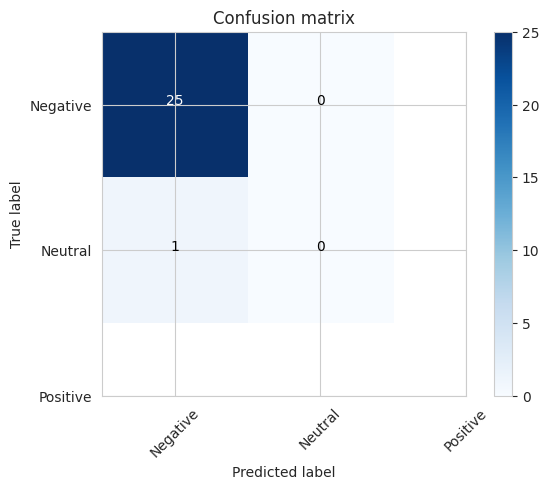

In [44]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import itertools  # Add this import for itertools
data = pd.read_csv('sentiment.csv')

# Declare independent and dependent variables
X = data['Review Body']
y = data['sentiments']

# Assuming you have y_test and y_pred defined
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

# Build the SVM model
clf = LinearSVC()

# Fit the train data into the model
clf.fit(X_train, Y_train)

# Predict the result
y_pred = clf.predict(X_test)

# Calculate confusion matrix
cm = metrics.confusion_matrix(Y_test, y_pred)

# Define the function plot_confusion_matrix (you should have this function implemented)
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plot_confusion_matrix(cm, classes=["Negative", "Neutral", "Positive"])
plt.show()


**ROC curve for svm classifier**

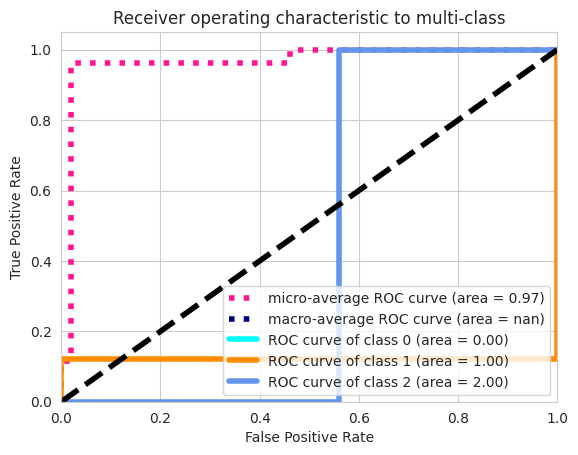

In [45]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Assuming 'X' is your input data and 'y' is your target feature
# Replace this with your actual data

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Binarize the target variable
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

# OvR Classifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=10))

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Obtain decision function scores on the test data
y_score = classifier.decision_function(X_test)

# Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally, average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label="micro-average ROC curve (area = {0:0.2f})"
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {0:0.2f})'
                   ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()





In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import pandas as pd

# Assuming X_train is a DataFrame with a column 'Review Body' containing text samples
# Assuming y_train is a binary array (0 or 1)
X_train = pd.read_csv('sentiment.csv')
y_train = X_train['sentiments']  # Assuming Sentiment is the target column

# Extract the text data from the DataFrame
text_samples = X_train['Review Body']

# Use TF-IDF vectorizer to convert text data to numeric format
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(text_samples)

# Create a LinearSVC model
model = LinearSVC()

# Train the model on the training data
model.fit(X_train_vectorized, y_train)

# Function to predict sentiment
def predict_sentiment(text):
    # Transform the input text using the same vectorizer
    text_vectorized = vectorizer.transform(text)

    # Predict sentiment using the trained LinearSVC classifier
    predicted_sentiment = model.predict(text_vectorized)

    # Return the predicted sentiment as a string

    if predicted_sentiment == 1:
        return 'Positive'
    elif predicted_sentiment == 2:
        return 'Neutral'
    elif predicted_sentiment == 0:
        return 'Negative'
    else:
        return 'Unknown Sentiment'


# Test the function with an example input text
text = ["Sizing runs small, didnÂ’t come in original Nike Packaging."]
predicted_sentiment_str = predict_sentiment(text)
print(predicted_sentiment_str)





Positive


In [48]:
import pandas as pd
import numpy as np
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the data set
data = pd.read_csv('sentiment.csv')

# Declare independent and dependent variables
X_text = data['Review Body']
X_url = data['productURL']  # Assuming you have a column named 'Product URL' in your CSV file
y = data['sentiments']

# Combine text and URL information
X_combined = X_text + ' ' + X_url

# Vectorize the combined data using TF-IDF vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.7, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf.fit_transform(X_combined)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=0)

# Build the SVM model
clf = LinearSVC()

# Fit the train data into the model
clf.fit(X_train, Y_train)

# Predict the result
y_pred = clf.predict(X_test)

# Display the confusion matrix, classification report, and accuracy score
print("Confusion Matrix\n", confusion_matrix(Y_test, y_pred))
print("\n")
print("Classification Report\n", classification_report(Y_test, y_pred))
print("\n")
print("Accuracy : ", accuracy_score(Y_test, y_pred) * 100)


Confusion Matrix
 [[13]]


Classification Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



Accuracy :  100.0


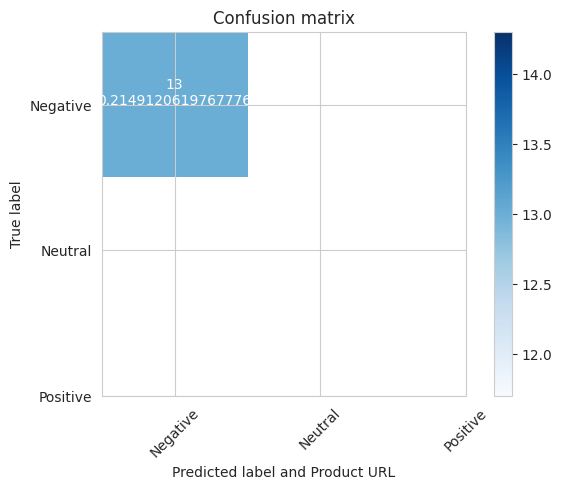

In [49]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import itertools

# ... (previous code)

# Calculate confusion matrix
cm = metrics.confusion_matrix(Y_test, y_pred)

# Define the function plot_confusion_matrix
def plot_confusion_matrix(cm, classes, urls, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{format(cm[i, j], fmt)}\n{urls[i, j]}",  # Add URLs to the label
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label and Product URL')

# Assuming you have a column named 'Product URL' in your CSV file
urls_test = X_test  # Modify this line based on your actual data structure

# Plot confusion matrix with URLs
plot_confusion_matrix(cm, classes=["Negative", "Neutral", "Positive"], urls=urls_test)
plt.show()


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Assuming you have defined vocab_size, embedding_dim, and max_length earlier in your code

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(24, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model (add optimizer, loss function, and metrics)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import pandas as pd

# Assuming X_train is a DataFrame with a column 'Review Body' containing text samples
# Assuming y_train is a binary array (0 or 1)
X_train = pd.read_csv('sentiment.csv')
y_train = X_train['sentiments']  # Assuming Sentiment is the target column

# Extract the product URLs from the DataFrame
product_urls = X_train['productURL']

# Use TF-IDF vectorizer to convert text data to numeric format
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(product_urls.astype(str))

# Create a LinearSVC model
model = LinearSVC()

# Train the model on the training data
model.fit(X_train_vectorized, y_train)

# Function to predict sentiment based on product URL
def predict_sentiment(url):
    # Transform the input URL using the same vectorizer
    url_vectorized = vectorizer.transform([url])

    # Predict sentiment using the trained LinearSVC classifier
    predicted_sentiment = model.predict(url_vectorized)

    # Return the predicted sentiment as a string
    if predicted_sentiment == 1:
        return 'Positive'
    elif predicted_sentiment == 2:
        return 'Neutral'
    elif predicted_sentiment == 0:
        return 'Negative'
    else:
        return 'Unknown Sentiment'

# Example product URL to test
product_url_to_test = "https://www.amazon.com/Nike-DD9293-300-Mens-Sneaker/product-reviews/B0B6G5R7KZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
predicted_sentiment_str = predict_sentiment(product_url_to_test)
print(f"Predicted Sentiment for {product_url_to_test}: {predicted_sentiment_str}")





Predicted Sentiment for https://www.amazon.com/Nike-DD9293-300-Mens-Sneaker/product-reviews/B0B6G5R7KZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews: Positive


In [52]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import pandas as pd

def get_reviews_from_amazon_url(url):
    # Assuming "sentiment.csv" contains a column named "Review Body" with reviews
    reviews_df = pd.read_csv("sentiment.csv")
    reviews = reviews_df['Review Body'].tolist()
    return reviews

def analyze_sentiment(reviews, threshold=0.1):
    if not reviews:
        return None

    # Perform sentiment analysis using TextBlob
    sentiment_scores = [TextBlob(review).sentiment.polarity for review in reviews]
    average_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)

    # Categorize sentiment
    sentiment = "Positive" if average_sentiment_score > threshold else "Negative" if average_sentiment_score < -threshold else "Neutral"

    # Calculate sentiment percentage
    positive_percentage = sum(1 for score in sentiment_scores if score > threshold) / len(sentiment_scores) * 100
    neutral_percentage = sum(1 for score in sentiment_scores if -threshold <= score <= threshold) / len(sentiment_scores) * 100
    negative_percentage = sum(1 for score in sentiment_scores if score < -threshold) / len(sentiment_scores) * 100

    sentiment_percentage = {
        "positive": positive_percentage,
        "neutral": neutral_percentage,
        "negative": negative_percentage
    }

    return average_sentiment_score, sentiment, sentiment_percentage

def predict_sentiment_using_model(url):
    # Assuming X_train is a DataFrame with a column 'Review Body' containing text samples
    # Assuming y_train is a binary array (0 or 1)
    X_train = pd.read_csv('sentiment.csv')
    y_train = X_train['sentiments']  # Assuming Sentiment is the target column

    # Extract the product URLs from the DataFrame
    product_urls = X_train['productURL']

    # Use TF-IDF vectorizer to convert text data to numeric format
    vectorizer = TfidfVectorizer()
    X_train_vectorized = vectorizer.fit_transform(product_urls.astype(str))

    # Create a LinearSVC model
    model = LinearSVC()

    # Train the model on the training data
    model.fit(X_train_vectorized, y_train)

    # Transform the input URL using the same vectorizer
    url_vectorized = vectorizer.transform([url])

    # Print decision function values for diagnostic purposes
    decision_values = model.decision_function(url_vectorized)
    print("Decision Function Values:", decision_values)

    # Predict sentiment using the trained LinearSVC classifier
    predicted_sentiment = model.predict(url_vectorized)

    # Return the predicted sentiment as a string
    if predicted_sentiment == 1:
        return 'Positive'
    elif predicted_sentiment == 2:
        return 'Neutral'
    elif predicted_sentiment == 0:
        return 'Negative'
    else:
        return 'Unknown Sentiment'

# Example usage with the provided Amazon link
amazon_url = 'https://www.amazon.com/Nike-DD9293-300-Mens-Sneaker/product-reviews/B0B6G5R7KZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
reviews = get_reviews_from_amazon_url(amazon_url)

# Adjust threshold based on your preference
result = analyze_sentiment(reviews, threshold=-0.4)

if result:
    sentiment_score, sentiment, sentiment_percentage = result
    print(f"Sentiment Score: {sentiment_score}")
    print(f"Sentiment: {sentiment}")
    print("Sentiment Percentage:")
    for label, percentage in sentiment_percentage.items():
        print(f"{label}: {percentage:.2f}%")

    # Predict sentiment using the trained model
    predicted_sentiment_str = predict_sentiment_using_model(amazon_url)
    print(f"Predicted Sentiment for {amazon_url}: {predicted_sentiment_str}")


Sentiment Score: 0.41123624495883176
Sentiment: Positive
Sentiment Percentage:
positive: 99.22%
neutral: 0.00%
negative: 44.19%
Decision Function Values: [[-0.97656874  0.98101779 -1.00559812]]
Predicted Sentiment for https://www.amazon.com/Nike-DD9293-300-Mens-Sneaker/product-reviews/B0B6G5R7KZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews: Positive


In [55]:
# Train the model (Remove epochs)
history = model.fit(training_padded, training_labels)

# Evaluate the model
accuracy = model.score(testing_padded, testing_labels)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 92.31%


**load and save the model**

In [56]:
import pickle

# Save the trained model and vectorizer
with open('sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('sentiment_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [57]:
import pickle

# Load the trained model
with open('sentiment_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the vectorizer
with open('sentiment_vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)


In [58]:
import joblib

# Save the trained model and vectorizer with joblib
joblib.dump(model, 'sentiment_model.joblib')
joblib.dump(vectorizer, 'sentiment_vectorizer.joblib')

# Load the trained model with joblib
loaded_model = joblib.load('sentiment_model.joblib')

# Load the vectorizer with joblib
loaded_vectorizer = joblib.load('sentiment_vectorizer.joblib')
